# 원, 삼각형, 사각형 구분하기
## 1. CNN 모델

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [7]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '../dataset/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '../dataset/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [9]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [10]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
________________________________________________

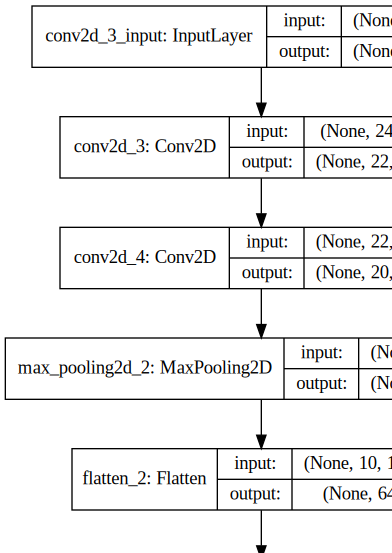

In [12]:

import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

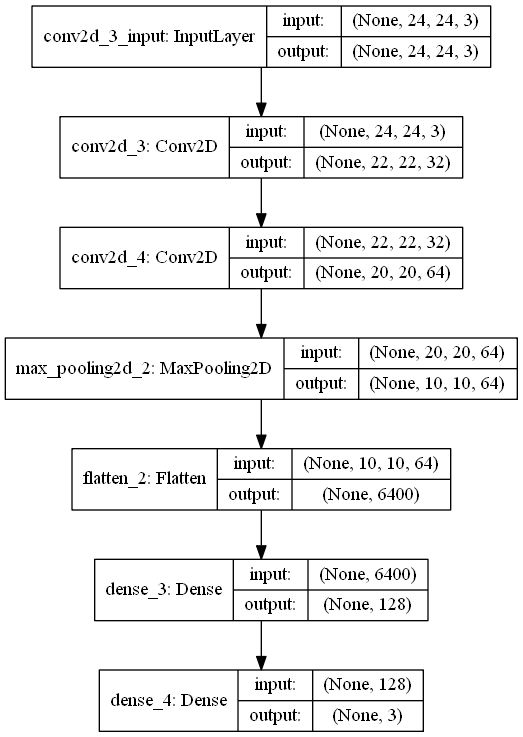

In [13]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)    # to_file='filename.png'

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

모델 학습시키기
- 첫번째 인자 : 훈련데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 train_generator으로 지정.
- steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정. 총 45개의 훈련 샘플이 있고 배치사이즈가 3이므로 15 스텝으로 지정.
- epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정. 50번을 반복적으로 학습.
- validation_data : 검증데이터셋을 제공할 제네레이터를 지정. 본 예제에서는 앞서 생성한 validation_generator으로 지정.
- validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정. 홍 15개의 검증 샘플이 있고 배치사이즈가 3이므로 5 스텝으로 지정.

In [23]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/50
15/15 [==============================] - 0s 11ms/step - loss: 1.9709e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 1.9232e-06 - accuracy: 1.0000 - val_loss: 1.9471e-06 - val_accuracy: 0.9333
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 1.8835e-06 - accuracy: 1.0000 - val_loss: 4.0257e-04 - val_accuracy: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 1.8305e-06 - accuracy: 1.0000 - val_loss: 1.5867e-04 - val_accuracy: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 1.7802e-06 - accuracy: 1.0000 - val_loss: 1.0649e-05 - val_accuracy: 0.9333
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 1.7405e-06 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9333
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 1.6981e-06 - accuracy: 1.0000 - val_loss:

In [24]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
accuracy: 93.33%


In [17]:
scores[0], scores[1]

(0.003499365644529462, 0.9333333373069763)

In [25]:

print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.003 0.997]
 [0.000 1.000 0.000]
 [1.000 0.000 0.000]
 [0.390 0.325 0.285]
 [0.999 0.000 0.001]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]]


In [26]:
test_generator.labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [27]:
for i in range(len(test_generator.labels)):
    print(test_generator.filenames[i], test_generator.labels[i], np.argmax(output[i]))

circle\circle016.png 0 1
circle\circle017.png 0 1
circle\circle018.png 0 2
circle\circle019.png 0 0
circle\circle020.png 0 0
rectangle\rectangle016.png 1 1
rectangle\rectangle017.png 1 2
rectangle\rectangle018.png 1 2
rectangle\rectangle019.png 1 1
rectangle\rectangle020.png 1 0
triangle\triangle016.png 2 0
triangle\triangle017.png 2 0
triangle\triangle018.png 2 0
triangle\triangle019.png 2 2
triangle\triangle020.png 2 2
